# Report for Optuna Hyperparameter tuning

In [1]:
import optuna
from optuna.visualization import (plot_contour, plot_edf, plot_intermediate_values, plot_optimization_history, 
                                  plot_parallel_coordinate, plot_param_importances, plot_rank, plot_slice, 
                                  plot_timeline)
import sqlite3
import matplotlib.pyplot as plt

C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
db_path = "sqlite:///db.sqlite3" 

In [3]:
with sqlite3.connect("db.sqlite3") as con:
    cur = con.cursor()
    studies = cur.execute("SELECT * FROM studies").fetchall()

In [4]:
studies

[(1, 'study_SVR'),
 (2, 'study_GradientBoostingRegressor'),
 (3, 'study_Ridge'),
 (4, 'study_Lasso'),
 (5, 'study_DecisionTreeRegressor')]

In [5]:
study_list=[name[1] for name in studies]
study_list

['study_SVR',
 'study_GradientBoostingRegressor',
 'study_Ridge',
 'study_Lasso',
 'study_DecisionTreeRegressor']

## Objective Value over Trials

+ -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- +
Study:'study_SVR'
Best trial number: 88
Best trial value: 0.15125887424595022
Best trial params: {'kernel': 'linear', 'C': 0.9980363705043286}


C:\Users\Home\AppData\Local\Temp\ipykernel_34120\2389136629.py:13: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


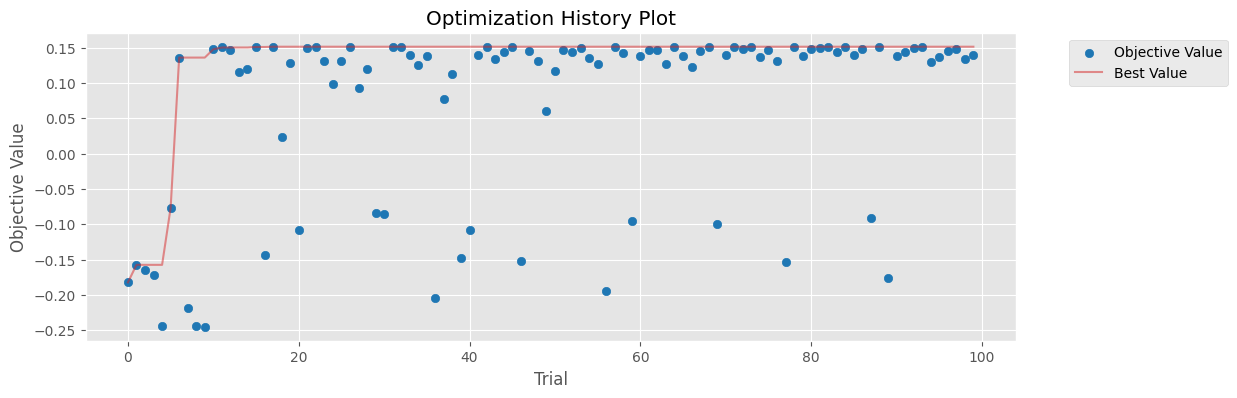

+ -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- +
Study:'study_GradientBoostingRegressor'
Best trial number: 98
Best trial value: 0.6647838620452969
Best trial params: {'n_estimators': 96, 'learning_rate': 0.20845104396213554, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 16}


C:\Users\Home\AppData\Local\Temp\ipykernel_34120\2389136629.py:13: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


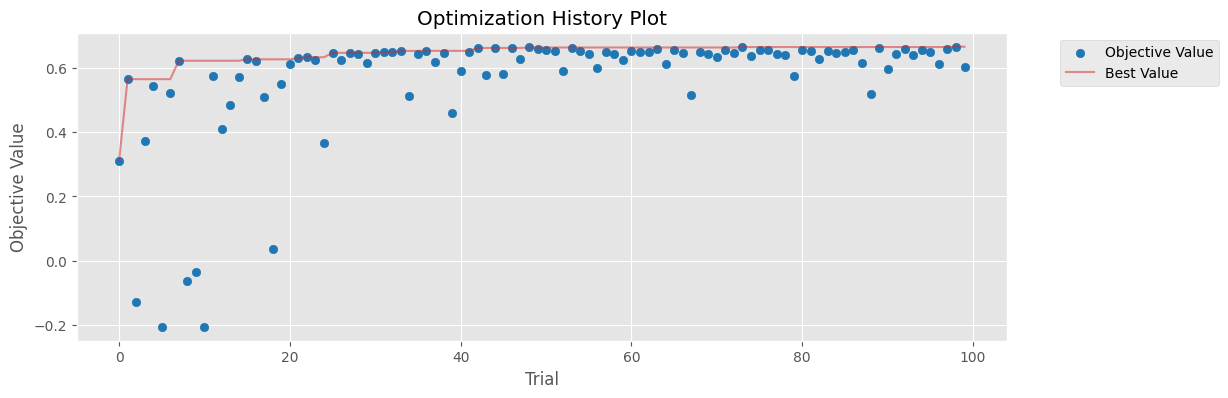

+ -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- +
Study:'study_Ridge'
Best trial number: 43
Best trial value: 0.5880049413982785
Best trial params: {'alpha': 3.309465812428683e-05}


C:\Users\Home\AppData\Local\Temp\ipykernel_34120\2389136629.py:13: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


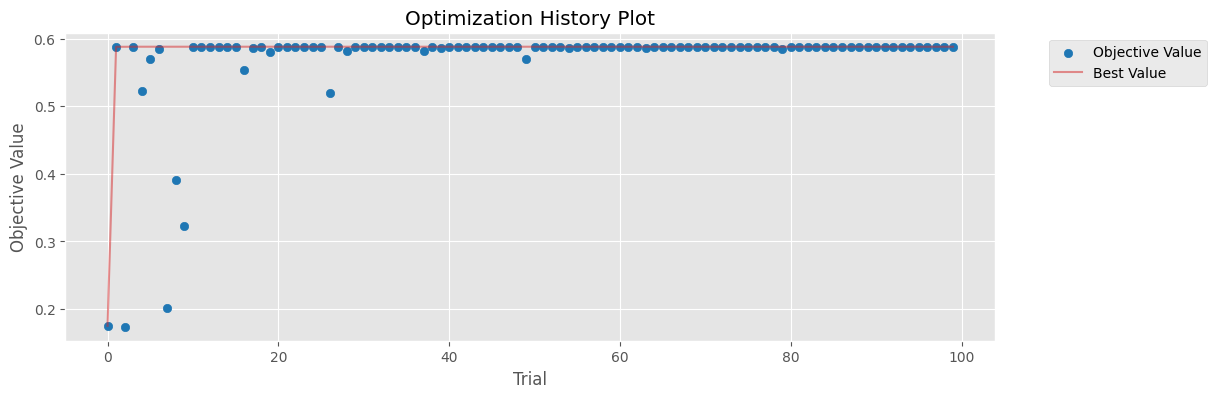

+ -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- +
Study:'study_Lasso'
Best trial number: 98
Best trial value: 0.5878853077421426
Best trial params: {'alpha': 1.0004130340355257e-05}


C:\Users\Home\AppData\Local\Temp\ipykernel_34120\2389136629.py:13: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


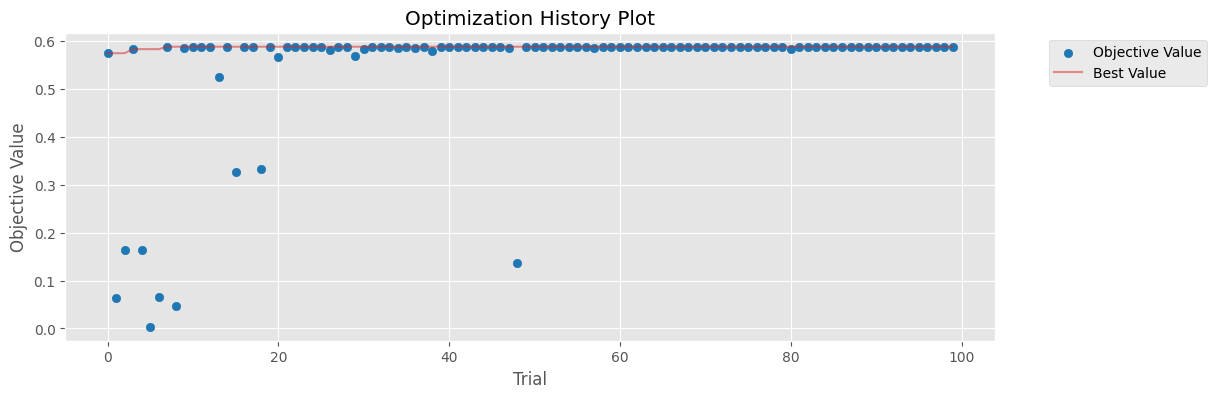

C:\Users\Home\AppData\Local\Temp\ipykernel_34120\2389136629.py:13: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


+ -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- +
Study:'study_DecisionTreeRegressor'
Best trial number: 22
Best trial value: 0.4385539922949945
Best trial params: {'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 16}


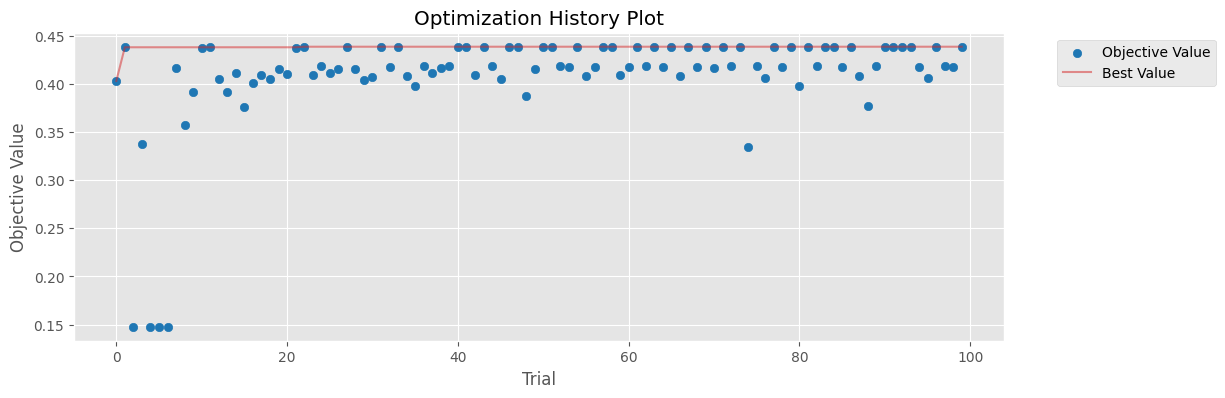

In [6]:
for study_name in study_list:
    plt.rcParams['figure.figsize'] = (12, 4)

    study = optuna.load_study(study_name=study_name, storage=db_path) 

    best_trial = study.best_trial
    print('+','-' * 200,'+')
    print(f"Study:'{study_name}'")
    print(f"Best trial number: {best_trial.number}")
    print(f"Best trial value: {best_trial.value}")
    print(f"Best trial params: {best_trial.params}")

    optuna.visualization.matplotlib.plot_optimization_history(study)
    plt.show()  


---

## Visualization - Study results for Gradient Boosting

In [7]:
study_name="study_GradientBoostingRegressor"

In [8]:
study = optuna.load_study(study_name="study_GradientBoostingRegressor", storage=db_path)

In [9]:
## Study Summary

num_trials = len(study.trials)
best_trial = study.best_trial

f"Number of Trials: {num_trials}, Best Objective Value: {best_trial.value}, Best Parameters: {best_trial.params}"

"Number of Trials: 100, Best Objective Value: 0.6647838620452969, Best Parameters: {'n_estimators': 96, 'learning_rate': 0.20845104396213554, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 16}"

## Parallel Coordinate Plot

In [10]:
plot_parallel_coordinate(study)

In [11]:
plot_parallel_coordinate(study, params=["learning_rate", "n_estimators"])

## Contour Plot for Hyperparameters


C:\Users\Home\AppData\Local\Temp\ipykernel_34120\3284857649.py:2: ExperimentalWarning:

plot_contour is experimental (supported from v2.2.0). The interface can change in the future.

[W 2023-09-01 17:44:46,592] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


array([[<Axes: ylabel='learning_rate'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='max_depth'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='min_samples_leaf'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='min_samples_split'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: xlabel='learning_rate', ylabel='n_estimators'>,
        <Axes: xlabel='max_depth'>, <Axes: xlabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_split'>,
        <Axes: xlabel='n_estimators'>]], dtype=object)

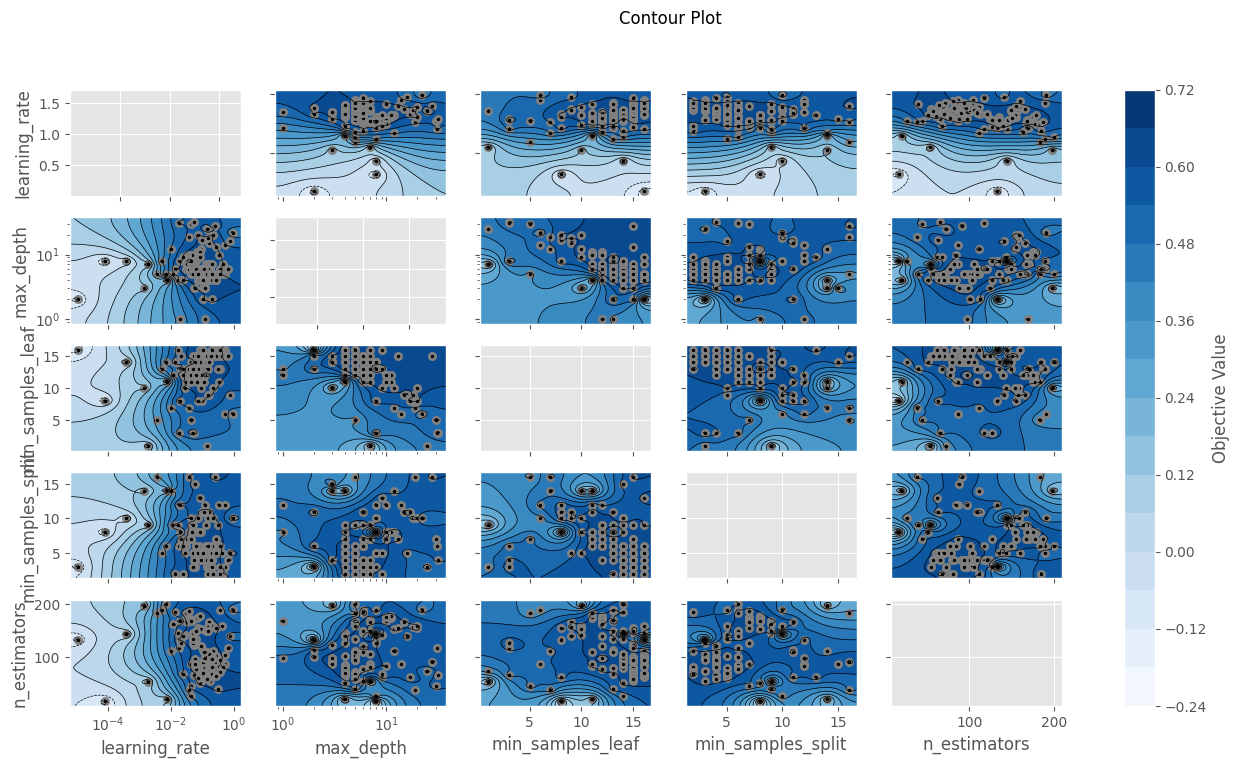

In [12]:
plt.rcParams['figure.figsize'] = (16, 8)
optuna.visualization.matplotlib.plot_contour(study)

## Parameter Importances vs. Objective Value

In [13]:
plot_param_importances(study)

## Parameter Importances vs. Duration

In [14]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

In [15]:
plot_timeline(study)

C:\Users\Home\AppData\Local\Temp\ipykernel_34120\547629393.py:1: ExperimentalWarning:

plot_timeline is experimental (supported from v3.2.0). The interface can change in the future.

